# Project_03_Sentiment Analysis  IMDB Dataset

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
cf.go_offline();
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')

pd.set_option('display.max_columns', None)


from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
from numpy import where

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

from scipy.sparse import hstack, vstack

from prettytable import PrettyTable
from scipy.stats import loguniform # Log-uniform is useful for searching penalty values as we often explore values at different orders of magnitude, at least as a first step
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\blues\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\blues\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv("IMDB Dataset.csv", delimiter=',', engine='python', encoding='utf-8', error_bad_lines=False)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

In [6]:
# Limiting current dataset to 10000 rows
df = df[:10000]

In [7]:
print('No. of datapoints/rows: {}'.format(df.shape[0]))
print('No. of features/columns: {}'.format(df.shape[1]))

No. of datapoints/rows: 10000
No. of features/columns: 2


In [8]:
print("Feature names: \n{}".format(df.columns))

Feature names: 
Index(['review', 'sentiment'], dtype='object')


In [9]:
#Check null and missing values
# Calculate the number of missing values in each column using isna()
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [10]:
# Calculate the number of missing values in each column
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [12]:
# Check original shape of the dataset
df.shape

(10000, 2)

In [13]:
df['sentiment'].value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

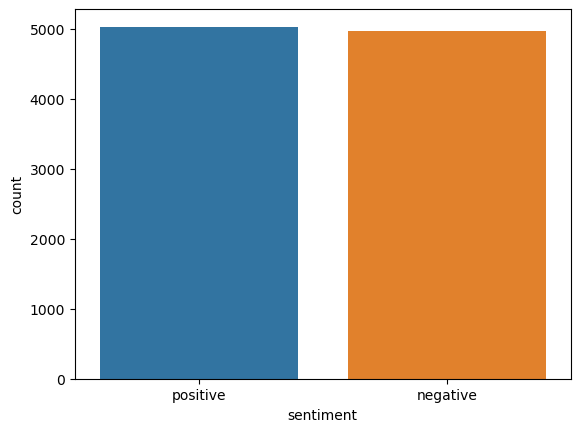

In [14]:
import seaborn as sns
sns.countplot(x='sentiment',data=df)

In [15]:
positive_review=list(df[df['sentiment']=='positive']['review'])[:100]
negative_review=list(df[df['sentiment']=='negative']['review'])[:100]

In [16]:
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt
stopwords=set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [17]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud)
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

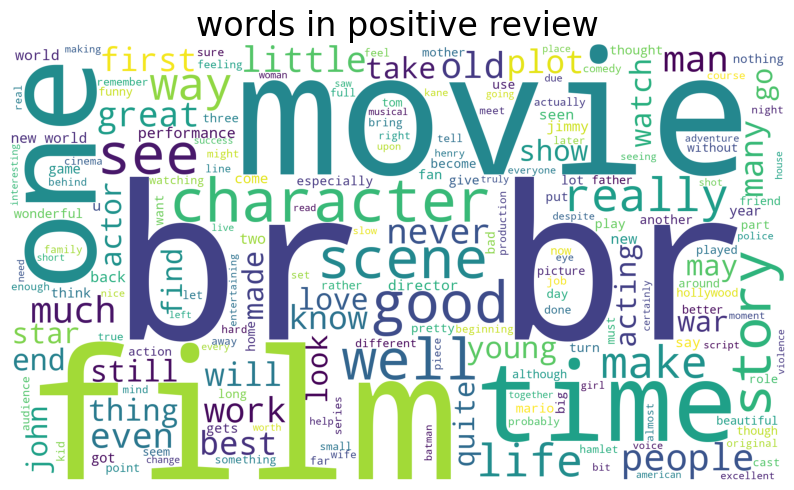

In [18]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

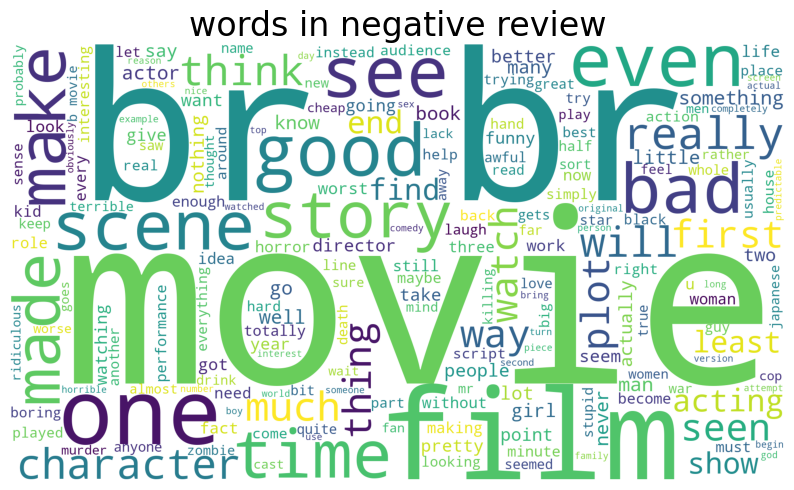

In [19]:
create_cloud(' '.join(negative_review).lower(),'words in negative review')

In [20]:
def text_processing(data):
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above sentence
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data['review'].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_reviews.append(sentance.strip())
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list_of_sentence=[]
    for  sentence in preprocessed_reviews:
        words_in_sentence=[]
        for words in sentence.split():
            words_in_sentence.append(porter.stem(words))

        list_of_sentence.append(' '.join(words_in_sentence))
    return(list_of_sentence)

In [21]:
x=text_processing(df[:5000])

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:02<00:00, 2345.01it/s]


In [22]:
df = df[:5000]

In [23]:
df['cleaned_review']=x

In [24]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...
1,A wonderful little production. <br /><br />The...,positive,a wonder littl production. the film techniqu u...
2,I thought this was a wonderful way to spend ti...,positive,i thought wonder way spend time hot summer wee...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy (jake) think zombi clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [25]:
X = df['cleaned_review']
Y = df['sentiment']

In [26]:
Y = list(Y)
for i in range(len(Y)):
    if Y[i]=='positive':
        Y[i]=1
    else:
        Y[i]=0
        
df['sentiment_score']=Y

Y=df['sentiment_score']

In [27]:
df

,review,sentiment,cleaned_review,sentiment_score
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...,1
1,A wonderful little production. <br /><br />The...,positive,a wonder littl production. the film techniqu u...,1
2,I thought this was a wonderful way to spend ti...,positive,i thought wonder way spend time hot summer wee...,1
3,Basically there's a family where a little boy ...,negative,basic famili littl boy (jake) think zombi clos...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...,1
...,...,...,...,...
4995,An interesting slasher film with multiple susp...,negative,an interest slasher film multipl suspects.incl...,0
4996,i watched this series when it first came out i...,positive,watch seri first came year old watch best frie...,1
4997,Once again Jet Li brings his charismatic prese...,positive,onc jet li bring charismat presenc movi screen...,1
4998,"I rented this movie, after hearing Chris Gore ...",negative,"i rent movie, hear chri gore say someth effect...",0


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X[:5000], Y[:5000], test_size=0.3, random_state=0)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500,), (1500,), (3500,), (1500,))

In [30]:
X_train

2858    thi film littl recommend it, though littl brea...
1559    thi kind inspir saccharin enough make sick. it...
1441    i confess i know involved, i forerunn the plan...
2179    thi movi delic argument search someth make thi...
1390    there dvd publish uk code cover, asin, vfc dis...
                              ...                        
4931    françoi villon real-lif poet rogu live pari ce...
3264    i want one - situat rich, set unusu interestin...
1653    yeah, sum up. thi movi horrifying. two minut i...
2607    i honest, i realli good time watch she man. de...
2732    ag excel present drama, suspens thriller rare ...
Name: cleaned_review, Length: 3500, dtype: object

In [31]:
list(y_test).count(0)

777

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [33]:
X_train_bow.shape,X_test_bow.shape

((3500, 30112), (1500, 30112))

In [34]:
X_train.shape

(3500,)

# 1. KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
for i in range(25,30):
    
    print('K',i)
    
    # initialization
    neigh = KNeighborsClassifier(n_neighbors=i)
    
    # Training
    neigh.fit(X_train_bow, y_train)
    
    # Test the training data
    y_pred_train = neigh.predict(X_train_bow)
    accuracy_train = accuracy_score(y_pred_train,y_train)
    f1_train = f1_score(y_pred_train,y_train)
   
    # Test the test data
    y_pred_test = neigh.predict(X_test_bow)
    accuracy_test = accuracy_score(y_pred_test,y_test)
    f1_test = f1_score(y_pred_test,y_test)
   
    print(accuracy_train,accuracy_test)
    print(f1_train,f1_test)
    print()

K 25
0.7245714285714285 0.6406666666666667
0.7169700528479155 0.6254343293954134

K 26
0.7102857142857143 0.634
0.6805293005671077 0.5887640449438202

K 27
0.7222857142857143 0.644
0.7136122569239836 0.6307053941908713

K 28
0.7077142857142857 0.6493333333333333
0.680811232449298 0.6120943952802359

K 29
0.7131428571428572 0.6506666666666666
0.7079697498545666 0.6401098901098901



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
    
# initialization
neigh = KNeighborsClassifier(n_neighbors=28)

# Training
neigh.fit(X_train_bow, y_train)

# Test the training data
y_pred_train = neigh.predict(X_train_bow)
accuracy_train = accuracy_score(y_pred_train,y_train)
f1_train = f1_score(y_pred_train,y_train)


# Test the test data
y_pred_test = neigh.predict(X_test_bow)
accuracy_test = accuracy_score(y_pred_test,y_test)
f1_test = f1_score(y_pred_test,y_test)


print(accuracy_train,accuracy_test)
print(f1_test,f1_test)

In [36]:
from sklearn.metrics import classification_report
target_names = ['Postive', 'Negative']
print(classification_report(y_pred_test, y_test, target_names=target_names))
print(classification_report(y_pred_train, y_train, target_names=target_names))

              precision    recall  f1-score   support

     Postive       0.66      0.66      0.66       767
    Negative       0.64      0.64      0.64       733

    accuracy                           0.65      1500
   macro avg       0.65      0.65      0.65      1500
weighted avg       0.65      0.65      0.65      1500

              precision    recall  f1-score   support

     Postive       0.73      0.71      0.72      1807
    Negative       0.70      0.72      0.71      1693

    accuracy                           0.71      3500
   macro avg       0.71      0.71      0.71      3500
weighted avg       0.71      0.71      0.71      3500



In [37]:
from sklearn.metrics import confusion_matrix
c= confusion_matrix(y_pred_train, y_train)
c

array([[1279,  528],
       [ 476, 1217]], dtype=int64)

<Axes: >

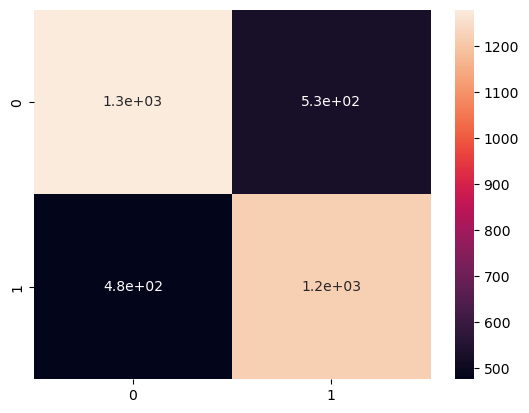

In [38]:
import seaborn as sns
sns.heatmap(c, annot=True)

In [39]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':list(range(10,30,2))}
neigh = KNeighborsClassifier()

clf = GridSearchCV(neigh, parameters)
clf.fit(X_train_bow, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 12, 14, 16, 18, 20, 22, 24, 26,
                                         28]})

In [40]:
clf.best_params_

{'n_neighbors': 28}

In [41]:
neigh = KNeighborsClassifier(n_neighbors=10, p=2)
neigh.fit(X_train_bow, y_train)

y_pred_train = clf.predict(X_train_bow)
f1_train = f1_score(y_pred_train,y_train)
print(f1_train)
print(classification_report(y_pred_train, y_train, target_names=target_names))

0.680811232449298
              precision    recall  f1-score   support

     Postive       0.79      0.68      0.73      2040
    Negative       0.63      0.75      0.68      1460

    accuracy                           0.71      3500
   macro avg       0.71      0.71      0.71      3500
weighted avg       0.72      0.71      0.71      3500



In [42]:
y_pred_test = clf.predict(X_test_bow)
f1_test = f1_score(y_pred_test,y_test)
print(f1_test)
print(classification_report(y_pred_test, y_test, target_names=target_names))

0.6120943952802359
              precision    recall  f1-score   support

     Postive       0.72      0.64      0.68       867
    Negative       0.57      0.66      0.61       633

    accuracy                           0.65      1500
   macro avg       0.65      0.65      0.65      1500
weighted avg       0.66      0.65      0.65      1500



# 2. Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_bow, y_train)
DecisionTreeClassifier()
y_pred = clf.predict(X_test_bow)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.682

# 3. Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100,
random_state=42)
rf_classifier.fit(X_train_bow, y_train)
RandomForestClassifier(random_state=42)
y_pred = rf_classifier.predict(X_test_bow)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.828

# 4. Boosting Algorithm

In [45]:
from sklearn.ensemble import AdaBoostClassifier
base_classifier = DecisionTreeClassifier(max_depth=3)
adaboost_classifier = AdaBoostClassifier(base_classifier,
n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train_bow, y_train)
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
random_state=42)
y_pred = adaboost_classifier.predict(X_test_bow)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.7646666666666667

# Boosting Algorithm is the best accuracy

In [47]:
accuracy

0.7646666666666667

# 5. Naive Bayes classifier

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [59]:
# BernoulliNB
B_classifier = BernoulliNB()
B_classifier.fit(X_train_bow, y_train)
BernoulliNB()
predictions_B = B_classifier.predict(X_test_bow)
accuracy_B = metrics.accuracy_score(y_test, predictions_B)
accuracy_B

0.816

# 6. Logistic Regression

In [46]:
from sklearn import linear_model
lrg = linear_model.LogisticRegression()
lrg.fit(X_train_bow, y_train)
LogisticRegression()
lrg.score(X_test_bow, y_test)

0.8513333333333334